In [135]:
%reload_ext autoreload

In [136]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
from pandas import Timestamp
import pandas as pd
import sys
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from statistics import mean 


In [115]:
sys.path.append('../lib')
import utils
import preprocessing

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms') % \
                  (method.__name__, (te - ts) * 1000)
        return result
    
    return timed

In [38]:
# Load in data

PATH = "../data/"
df = pd.read_csv(f'{PATH}cases.csv', low_memory=False, encoding='latin1')

df.rename(columns={'Age (Hours)': 'case_hours', 'Case Origin': 'origin', 'Directory ID': 'n_number', 'Open': 'open', 'Closed': 'closed'}, inplace=True)

In [39]:
PATH = "../data/"
df_ml = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [61]:
unique_ml = df_ml.username.unique()
len(unique_ml)

6497

In [41]:
df.shape

(162145, 7)

In [42]:
df = df.loc[df.n_number.isin(unique_ml)]

In [43]:
df.shape

(117288, 7)

In [44]:
#df['date'] = df['Date/Time Opened'].str.split(" ", expand = True)[0]
df['date'] = pd.to_datetime(df['Date/Time Opened'], format='%d/%m/%Y %I:%M %p')
df = df.drop(columns=['Date/Time Opened', 'Directory ID (web asset)'])

In [45]:
df.set_index('date', inplace=True)

In [16]:
#df['total'] = df.loc[:,['open','closed']].sum(axis=1)

In [199]:
test = df.groupby(['n_number']).resample('7D').mean().fillna(0)

In [139]:
current_date = datetime.date(datetime.now())
days_ago_7 = current_date - timedelta(days=7)
print(current_date), print(days_ago_7)

2019-12-01
2019-11-24


(None, None)

In [174]:
test.rolling(window=12).mean().tail(50)

case_hours          open    closed
n_number date                                          
n005319  2018-09-11  241.083333  2.960595e-16  0.333333
         2018-09-18  243.479167  2.960595e-16  0.416667
         2018-09-25  243.479167  2.960595e-16  0.416667
         2018-10-02  245.284722  2.960595e-16  0.500000
         2018-10-09  244.951389  2.960595e-16  0.416667
         2018-10-16  240.201389  2.960595e-16  0.333333
         2018-10-23   21.868056  2.960595e-16  0.250000
         2018-10-30   21.868056  2.960595e-16  0.250000
         2018-11-06   21.868056  2.960595e-16  0.250000
         2018-11-13   27.868056  2.960595e-16  0.333333
         2018-11-20   10.201389  2.960595e-16  0.250000
         2018-11-27   10.201389  2.960595e-16  0.250000
         2018-12-04   10.201389  2.960595e-16  0.250000
         2018-12-11    7.805556  2.960595e-16  0.166667
         2018-12-18    9.722222  2.960595e-16  0.250000
         2018-12-25   67.250000  2.960595e-16  0.250000
         2019-01-01   67.250000  2.960595e-16  0.250000
         2019-01-08   67.250000  2.960595e-16  0.250000
         2019-01-15   67.250000  2.960595e-16  0.250000
         2019-01-22   67.625000  2.960595e-16  0.333333
         2019-01-29   67.625000  2.960595e-16  0.333333
         2019-02-05   61.625000  2.960595e-16  0.250000
         2019-02-12   61.625000  2.960595e-16  0.250000
         2019-02-19   61.625000  2.960595e-16  0.250000
         2019-02-26  247.458333  2.960595e-16  0.333333
         2019-03-05  247.458333  2.960595e-16  0.333333
         2019-03-12  245.541667  2.960595e-16  0.250000
         2019-03-19  186.208333  2.960595e-16  0.166667
         2019-03-26  186.208333  2.960595e-16  0.166667
         2019-04-02  186.208333  2.960595e-16  0.166667
         2019-04-09  186.208333  2.960595e-16  0.166667
         2019-04-16  185.833333  2.960595e-16  0.083333
         2019-04-23  185.833333  2.960595e-16  0.083333
         2019-04-30  185.833333  2.960595e-16  0.083333
         2019-05-07  185.833333  2.960595e-16  0.083333
         2019-05-14  185.833333  2.960595e-16  0.083333
         2019-05-21   14.500000  2.960595e-16  0.083333
         2019-05-28   14.500000  2.960595e-16  0.083333
         2019-06-04   14.500000  2.960595e-16  0.083333
         2019-06-11   14.500000  2.960595e-16  0.083333
         2019-06-18   14.500000  2.960595e-16  0.083333
         2019-06-25   14.500000  2.960595e-16  0.083333
         2019-07-02   14.500000  2.960595e-16  0.083333
         2019-07-09   49.208333  2.960595e-16  0.166667
         2019-07-16   49.208333  2.960595e-16  0.166667
         2019-07-23   49.208333  2.960595e-16  0.166667
         2019-07-30   49.208333  2.960595e-16  0.166667
         2019-08-06   49.208333  2.960595e-16  0.166667
         2019-08-13   34.708333  2.960595e-16  0.083333
         2019-08-20  202.458333  8.333333e-02  0.083333

In [81]:
test.agg(['max', 'median', 'mean'])

,case_hours,open,closed
max,16253.000000,1.000000,1.000000
median,0.000000,0.000000,0.000000
mean,131.409175,0.009699,0.266972


In [385]:
df_monthly = df.groupby(['n_number']).resample('M').sum().fillna(0)
df_monthly['total'] = df_monthly['open'] + df_monthly['closed']

In [386]:
df_monthly_median = df.groupby(['n_number']).resample('M').median().fillna(0)
df_monthly_median.rename(columns={'case_hours': 'case_hours_median', 'open': 'open_median', 'closed':'closed_median', 'total': 'total_median'}, inplace=True)

In [387]:
df_monthly_mean = df.groupby(['n_number']).resample('M').mean().fillna(0)
df_monthly_mean.rename(columns={'case_hours': 'case_hours_mean', 'open': 'open_mean', 'closed':'closed_mean', 'total': 'total_mean'}, inplace=True)


In [388]:
df_2monthly_rolling = df_monthly.rolling(window=2).mean()
df_2monthly_rolling.rename(columns={'case_hours': 'case_hours_2mth_mean', 'open': 'open_2mth_mean', 'closed':'closed_2mth_mean', 'total': 'total_2mth_mean'}, inplace=True)

In [389]:
df_3monthly_rolling = df_monthly.rolling(window=3).mean()
df_3monthly_rolling.rename(columns={'case_hours': 'case_hours_3mth_mean', 'open': 'open_3mth_mean', 'closed':'closed_3mth_mean', 'total': 'total_3mth_mean'}, inplace=True)

In [390]:
#df_monthly_mean_p75 = df.groupby(['n_number']).resample('M').quantile(q=.75).fillna(0)
#df_monthly_mean_p75.rename(columns={'case_hours': 'case_hours_p75', 'open': 'open_p75', 'closed':'closed_p75'}, inplace=True)

#df_monthly_p['p75'] = df.groupby(['n_number']).resample('M').quantile(q=.75).fillna(0)
#df_monthly_p['p95'] = df.groupby(['n_number']).resample('M').quantile(q=.95).fillna(0)

In [391]:
df_new = df_monthly_mean.join(df_monthly_median)
df_new = df_new.join(df_2monthly_rolling)
df_new = df_new.join(df_3monthly_rolling)
df_new = df_new.join(df_monthly)
df_new

case_hours_mean  open_mean  closed_mean  total_mean  \
n_number date                                                              
L003257  2018-03-31           4276.0        0.0          1.0         1.0   
         2018-04-30              0.0        0.0          0.0         0.0   
         2018-05-31              0.0        0.0          0.0         0.0   
         2018-06-30              0.0        0.0          0.0         0.0   
         2018-07-31              0.0        0.0          0.0         0.0   
...                              ...        ...          ...         ...   
n005319  2019-04-30              0.0        0.0          0.0         0.0   
         2019-05-31            174.0        0.0          1.0         1.0   
         2019-06-30              0.0        0.0          0.0         0.0   
         2019-07-31            416.5        0.0          1.0         1.0   
         2019-08-31           2013.0        1.0          0.0         1.0   

                     case_hours_median  open_median  closed_median  \
n_number date                                                        
L003257  2018-03-31             4276.0          0.0            1.0   
         2018-04-30                0.0          0.0            0.0   
         2018-05-31                0.0          0.0            0.0   
         2018-06-30                0.0          0.0            0.0   
         2018-07-31                0.0          0.0            0.0   
...                                ...          ...            ...   
n005319  2019-04-30                0.0          0.0            0.0   
         2019-05-31              174.0          0.0            1.0   
         2019-06-30                0.0          0.0            0.0   
         2019-07-31              416.5          0.0            1.0   
         2019-08-31             2013.0          1.0            0.0   

                     total_median  case_hours_2mth_mean  open_2mth_mean  \
n_number date                                                             
L003257  2018-03-31           1.0                   NaN             NaN   
         2018-04-30           0.0                2138.0             0.0   
         2018-05-31           0.0                   0.0             0.0   
         2018-06-30           0.0                   0.0             0.0   
         2018-07-31           0.0                   0.0             0.0   
...                           ...                   ...             ...   
n005319  2019-04-30           0.0                   0.0             0.0   
         2019-05-31           1.0                  87.0             0.0   
         2019-06-30           0.0                  87.0             0.0   
         2019-07-31           1.0                 416.5             0.0   
         2019-08-31           1.0                1423.0             0.5   

                     closed_2mth_mean  total_2mth_mean  case_hours_3mth_mean  \
n_number date                                                                  
L003257  2018-03-31               NaN              NaN                   NaN   
         2018-04-30               0.5              0.5                   NaN   
         2018-05-31               0.0              0.0           1425.333333   
         2018-06-30               0.0              0.0              0.000000   
         2018-07-31               0.0              0.0              0.000000   
...                               ...              ...                   ...   
n005319  2019-04-30               0.0              0.0            743.333333   
         2019-05-31               0.5              0.5             58.000000   
         2019-06-30               0.5              0.5             58.000000   
         2019-07-31               1.0              1.0            335.666667   
         2019-08-31               1.0              1.5            948.666667   

                     open_3mth_mean  closed_3mth_mean  total_3mth_mean  \
n_number date                 

In [392]:
df_new.to_csv('cases_monthly_aggregates.csv')

In [250]:
df_test = df.groupby(['n_number', 'origin']).resample('M').sum().fillna(0)

In [365]:
df_test2 = df.groupby(['origin']).resample('M').sum().fillna(0)

In [367]:
df_test2.to_csv('origin_data.csv')

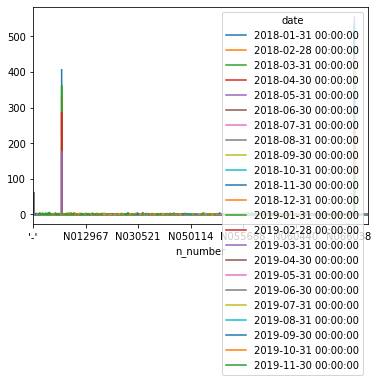

In [346]:
df_monthly['open'].unstack().plot()

TypeError: pie() missing 1 required positional argument: 'x'

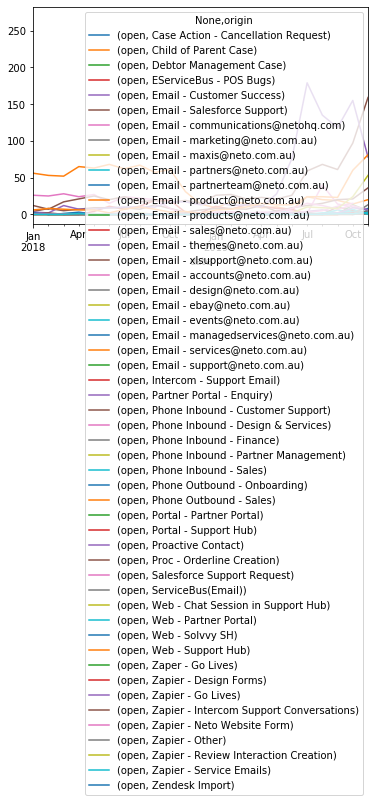

In [338]:
# plot data
#fig, ax = plt.subplots(figsize=(15,5))

# use unstack()
#plt.xticks(df_test2.index)

df_test2.loc[df_test2.open < 300].groupby(['date','origin'])[['open']].sum().unstack().plot().pie()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=.5)


In [392]:
df_aggregate = pd.DataFrame()
unique_n_numbers = df['Directory ID'].unique()
df_aggregate['n_number'] = unique_n_numbers

df['month'] = df['date'].map(lambda x: x.month)
df['year'] = df['date'].map(lambda x: x.year)

#df.set_index('date', inplace = True)

In [394]:
#df.Open.loc[(df['Directory ID'] == 'N001096')].resample('M').mean()

In [ ]:
unique_n_numbers = df['Directory ID'].unique()

In [389]:
unique_years = df.year.unique()

def create_blank_dataframe(unique_year_list):
    rows_list = []
    for n_number in unique_n_numbers:
        for year in unique_years:
            for month in range(1,12):
                dict1 = {
                    'n_number' : n_number,
                    'year' : year,
                    'month' : month,
                    'monthly_total' : 0,
                    'two_month_avg' : 0,
                    'three_month_avg' : 0
                }
                rows_list.append(dict1)
    return pd.DataFrame(rows_list, columns=['n_number', 'year','month', 'monthly_total', 'two_month_avg', 'three_month_avg'])

df_monthly_open = create_blank_dataframe(unique_years)
df_monthly_closed = create_blank_dataframe(unique_years)
df_monthly_age = create_blank_dataframe(unique_years)
df_monthly_origin = create_blank_dataframe(unique_years)

In [390]:
df_monthly_open

,n_number,year,month,monthly_total,two_month_avg,three_month_avg
0,'-',2018,1,0,0,0
1,'-',2018,2,0,0,0
2,'-',2018,3,0,0,0
3,'-',2018,4,0,0,0
4,'-',2018,5,0,0,0
...,...,...,...,...,...,...
140289,WAYNERENTBUY541,2019,7,0,0,0
140290,WAYNERENTBUY541,2019,8,0,0,0
140291,WAYNERENTBUY541,2019,9,0,0,0
140292,WAYNERENTBUY541,2019,10,0,0,0


In [373]:
#df_monthly_open.n_number.unique()[100:200]

# Added a date field
df_monthly_open['date'] = pd.to_datetime(df_monthly_open.assign(day=1).loc[:, ['year','month','day']])


In [374]:
#df_monthly_open.iloc[1].date, df_monthly_open.iloc[1].date + relativedelta(months=-1)

In [375]:
#pd.to_datetime(df['date']).dt.date + relativedelta(months=1)

In [378]:
n_numbers = df_monthly_open.n_number.unique()[100:500]

#@timeit

for n_number in n_numbers:
    for year in [2019]:
        for month in [1]:
            monthly_total = df.Open.loc[(df['Directory ID'] == n_number) &
                                                 (df.year == year) &
                                                 (df.month == month)].sum()
            
            month_ago = df.Open.loc[(df['Directory ID'] == n_number) &
                                    (df['date'] == pd.to_datetime(df['date']).dt.date + relativedelta(months=-1))].sum()
            
            two_months_ago = df.Open.loc[(df['Directory ID'] == n_number) &
                                         (df['date'] == pd.to_datetime(df['date']).dt.date + relativedelta(months=-2))].sum()
            
            df_monthly_open['monthly_total'].loc[(df_monthly_open.n_number == n_number) &
                                                 (df_monthly_open.year == year) &
                                                 (df_monthly_open.month == month)] = monthly_total
            
            df_monthly_open['two_month_avg'].loc[(df_monthly_open.n_number == n_number) &
                                                 (df_monthly_open.year == year) &
                                                 (df_monthly_open.month == month)] = mean([monthly_total, month_ago])
            
            df_monthly_open['three_month_avg'].loc[(df_monthly_open.n_number == n_number) &
                                                   (df_monthly_open.year == year) &
                                                   (df_monthly_open.month == month)] = mean([monthly_total, month_ago, two_months_ago])
            
            
            
            

In [379]:
df_monthly_open.loc[df_monthly_open.monthly_total > 0]

,n_number,year,month,monthly_total,two_month_avg,three_month_avg,date
2277,N001021,2019,1,1,0,0,2019-01-01
2431,N001030,2019,1,2,1,0,2019-01-01
3047,N001096,2019,1,1,0,0,2019-01-01
4411,N001462,2019,1,2,1,0,2019-01-01
4763,N001682,2019,1,1,0,0,2019-01-01
5907,N002627,2019,1,1,0,0,2019-01-01
6787,N004252,2019,1,2,1,0,2019-01-01
7029,N004413,2019,1,1,0,0,2019-01-01
7909,N005035,2019,1,1,0,0,2019-01-01
9493,N005871,2019,1,4,2,1,2019-01-01


In [145]:
# All time stats

df_aggregate = pd.DataFrame()

df_aggregate['n_number'] = unique_n_numbers
df_aggregate['open'] = 0
df_aggregate['closed'] = 0

aggregate_fields = ['open', 'closed']

for n_number in unique_n_numbers:
    for aggregate_field in aggregate_fields:
        field_sum = df.Open.loc[(df['Directory ID'] == n_number)].sum()
        df_aggregate[aggregate_field].loc[df_aggregate['n_number'] == n_number] = field_sum